# Защита персональных данных клиентов

Небходимо защитить данные клиентов страховой компании «Хоть потоп». Целью является разработка метода преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Описание данных:**
    
    
* **Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.
* **Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [2]:
# Импортируем библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter('ignore')

In [3]:
# откроем данные

data = pd.read_csv('/datasets/insurance.csv')

In [ ]:
# Функция для вывода информации об изучаемых данных

def data_info(data):

    display(data.head(10))
    display(data.describe())
    print(data.info())
    print('Количество дубликатов:', sum(data.duplicated()))

In [ ]:
data_info(data)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None
Количество дубликатов: 153


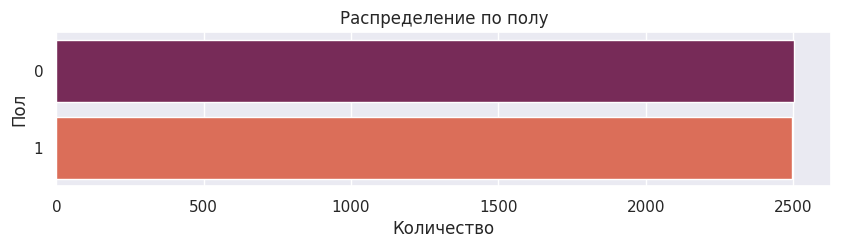

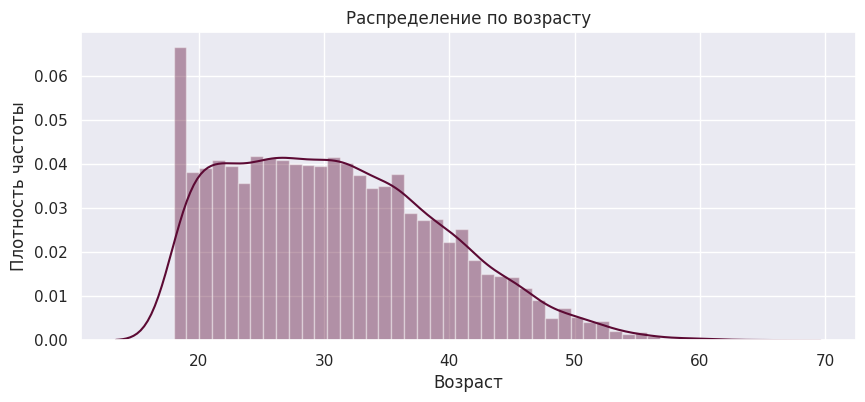

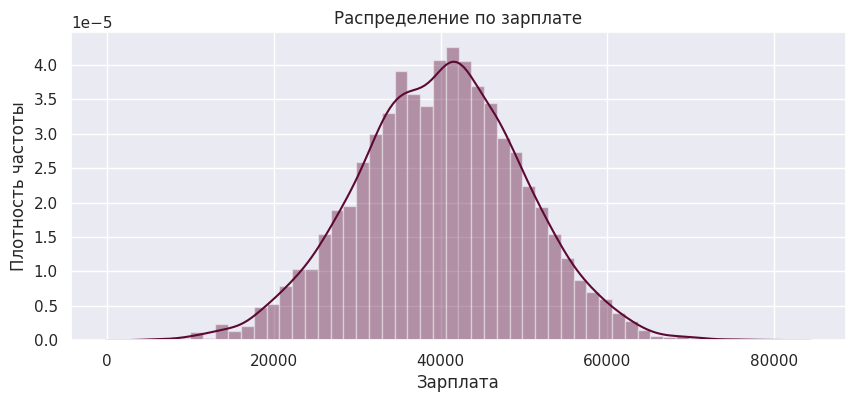

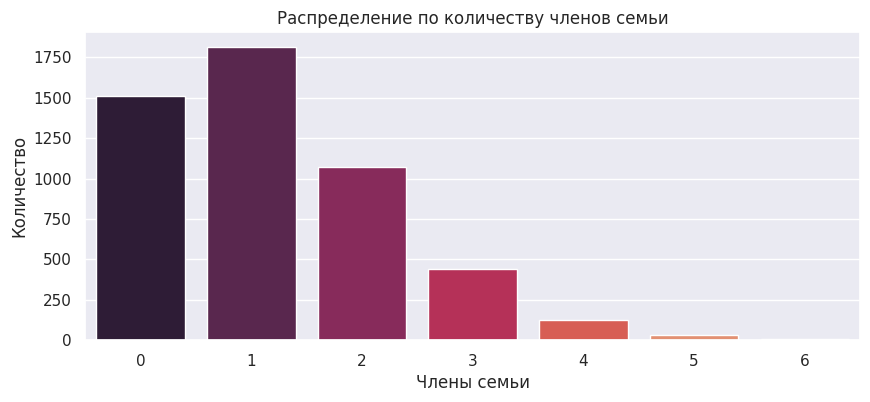

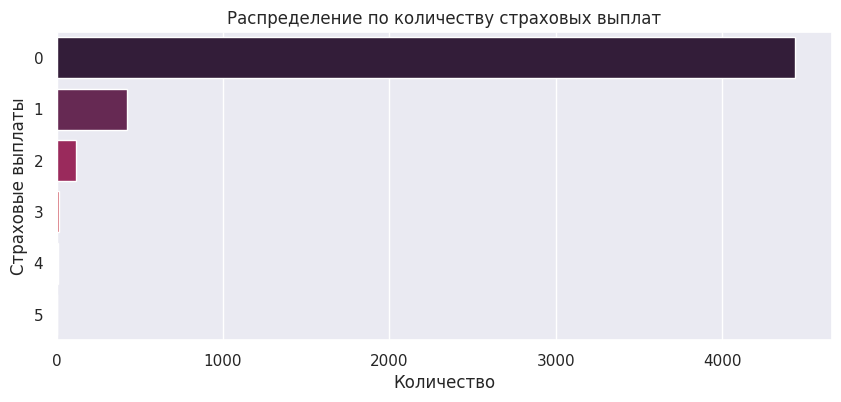

In [5]:
# Рассмотрим распределение по признакам

fig, ax = plt.subplots(figsize=(10, 2))
sns.countplot(y='Пол', data=data, palette='rocket')
ax.set_title('Распределение по полу')
plt.xlabel('Количество');

sns.set()
fig, ax = plt.subplots(figsize=(10, 4))
sns.distplot(data['Возраст'], bins=len(data['Возраст'].unique()),color = '#5c0a34')
ax.set_title('Распределение по возрасту')
plt.ylabel('Плотность частоты');

fig, ax = plt.subplots(figsize=(10, 4))
sns.distplot(data['Зарплата'], color = '#5c0a34')
ax.set_title('Распределение по зарплате')
plt.ylabel('Плотность частоты');

sns.set()
fig, ax = plt.subplots(figsize=(10, 4))
sns.countplot(x='Члены семьи', data=data, palette='rocket')
ax.set_title('Распределение по количеству членов семьи')
plt.ylabel('Количество');

fig, ax = plt.subplots(figsize=(10, 4))
sns.countplot(y='Страховые выплаты', data=data, palette='rocket')
ax.set_title('Распределение по количеству страховых выплат')
plt.xlabel('Количество');

### Выводы

Анализ данных показал, что в выборке предоставлены данные примерно в равной степени о мужчинах и оженщинах. Так же большая часть данных о людях в возрасте от 18 до 35 лет, большая часть которых получают зарплату около 40 тыс. рублей. В таблице приведены данные в большей степени либо про одинких людей, либо о семьях из 2х человек. Это коррелирует с данными о возрасте, так как многие люди заводят детей после 30-35 лет.

В данных обнаружены 153 дубликата.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Изменится ли качество линейной регрессии?**

**Ответ:**
Качество линейной регрессии не изменится.

**Обоснование:**

Пусть  X — матрица признаков, O — обратимая матрица.

Тогда, домножим признаки на обратимую матрицу:

$$
w = ((XO)^TXO)^{-1}(XO)^Ty
$$

$$
w = O^{-1}(O^TX^TX)^{-1}O^TX^Ty
$$

$$
w = O^{-1}(X^TX)^{-1}(O^T)(O^T)^{-1}X^Ty
$$

Так как произведение матрицы на обратную ей матрицу дает единичную матрицу, то сократим уравнение

$$
w = O^{-1}(X^TX)^{-1}X^Ty
$$

Сократим выражение в соответствии с формулой обучения и подставим в формулу предсказания:


$$
a = Xw
$$

При умножении на обратимую матрицу, качество линейной регресии не изменится.

## Алгоритм преобразования

**Алгоритм**

* Разделить данные на признаки и целевой признак.
* Создать случайную матрицу.
* Проверить ее на обратимость.
* Умножить на признаки.
* Найдем метрики обученной модели на исходных признаках и на признаках умноженных на нашу матрицу. Сравнить метрики между собой.

**Обоснование**

В пункте 3 было показано, что умножение признаков на обратимую квадратную матрицу не изменяет значение предсказаний.

## Проверка алгоритма

In [ ]:
# Разделим данные на признаки и целевой признак: features и target

features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

In [ ]:
# Создадим класс LinReg

class LinReg:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv((X.T @ X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]
        print(w)

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [ ]:
# Напишем функцию преобразования исходных данных в зашифрованный вид. Для этого закодируем исходную матрицу.

def encode(features):
    random_matrix = np.random.normal(0, 1, (features.shape[1], features.shape[1]))
    encoded_features = features.dot(random_matrix)
    return encoded_features

In [ ]:
# Создадим и обучим модель. Используя обучающую выборку найдем предсказания и сохраним их в переменной predictions.
# Напечатаем на экране веса и значение метрики R2, вычисленной по MSE.

model = LinReg()
model.fit(features, target)
predictions = model.predict(features)
r2_score(target, predictions)

In [ ]:
# Создадим случайную квадратную матрицу.Размер матрицы по количеству столбцов features.

random_matrix = np.random.normal(0, 1, (features.shape[1], features.shape[1]))
random_matrix

In [ ]:
# Получим обратную матрицу методом np.linalg.inv().

np.linalg.inv(random_matrix)

In [ ]:
# Получим произведение исходной и обратной матриц.

random_matrix @ np.linalg.inv(random_matrix)

In [ ]:
# Умножим признаки на обратимую матрицу random_matrix.

encoded_features = features.dot(random_matrix)
encoded_features

In [ ]:
# Обучим модель на новых признаках.

model = LinReg()
model.fit(encoded_features, target)
predictions = model.predict(encoded_features)
r2_score(target, predictions)

### Выводы
* R2 на исходных признаках: 0.42494550286668
* R2 на преобразованных признаках: 0.4249455028666691

Качество линейной регрессии не изменилось, можно сделать вывод, что алгоритм преобразования данных работает правильно.

# Общий вывод:

* Приведены данные клиентов страховой компании (признаки: пол, возраст, размер зарплаты, кол-во членов семьи, кол-во страховых выплат за 5 лет), с целью является разработки метода преобразования данных, по которым было бы сложно восстановить персональную информацию.
* Анализ данных показал, что в выборке предоставлены данные примерно в равной степени о мужчинах и оженщинах. Так же большая часть данных о людях в возрасте от 18 до 35 лет, большая часть которых получают зарплату около 40 тыс. рублей. В таблице приведены данные в большей степени либо про одинких людей, либо о семьях из 2х человек. Это коррелирует с данными о возрасте, так как многие люди заводят детей после 30-35 лет.
* Было установлено, что при умножении на обратимую матрицу, качество линейной регресии не изменится.
* Предложен алгоритм защиты персональных данных клиентов.Для этого признаки умножаются на случайную квадратную обратимую матрицу с размером равным количеству столбцов в выборке с признаками.
* Проверили алгоритм. Метрика средней квадратичной ошибки при этом не ухудшилась.